In [1]:
# GET DATA
import pandas as pd
import numpy as np
from get_data import get_assets, get_positional_data

get_assets()
positions = get_positional_data()


This process will pip install Kaggle and download data through Kaggle API.

Please confirm that you've downloaded Kaggle JSON credentials into directory

Data Successfully Downloaded


In [2]:
positions.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,week
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN,1
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN,1
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH,1
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN,1
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH,1


In [3]:
import form_pred
import importlib
importlib.reload(form_pred)
from form_pred import clean_positional

clean_pos = clean_positional(positions)

In [4]:
clean_pos.head()

,CBL0_x,CBR0_x,DEL0_x,DER0_x,DLL0_x,DLR0_x,DTL0_x,DTL1_x,DTR0_x,FBL0_x,...,WRL1_in,WRL2_in,WRL3_in,WRR0_in,WRR1_in,WRR2_in,WRR3_in,gameId,playId,offenseFormation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.12,...,True,False,False,False,False,False,False,2018090600,75,I_FORM
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,False,False,False,True,True,False,False,2018090600,146,SINGLEBACK
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,False,False,False,True,False,False,False,2018090600,168,SHOTGUN
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,False,False,False,True,True,True,False,2018090600,190,SHOTGUN
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,False,False,False,False,False,False,False,2018090600,256,SHOTGUN


In [5]:
import ball_movement
import importlib
importlib.reload(ball_movement)
from ball_movement import ball_quadrants, make_quad_chart

quads = ball_quadrants(positions,4)

make_quad_chart(quads)

alt.Chart(...)

In [21]:
import def_clean
importlib.reload(def_clean)
from def_clean import DefensiveCleaning

def_cleaning = DefensiveCleaning(n_cuts=11)
d = def_cleaning.generate_full_df(1, 14)

..............................initializing
..data downloaded...
...Week 1 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...distance calculated...
...action type generated...
.....Week 1 COMPLETE.....

   7.14% COMPLETE   

--- 0.5 minutes elapsed ---

the weeks complete:  [1]
...Week 2 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...distance calculated...
...action type generated...
.....Week 2 COMPLETE.....

   14.29% COMPLETE   

--- 1.2 minutes elapsed ---

the weeks complete:  [1 2]
...Week 3 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...distance calculated...
...action type generated...
.....Week 3 COMPLETE.....

   21.43% COMPLETE   

--- 1.8 minutes elapsed ---

the weeks complete:  [1 2 3]
...Week 4 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...distance calculated...
...

In [22]:
d = pd.read_csv('assets/def_clean_output.csv')
d.head()

,gameId,playId,defendersInTheBox,numberOfPassRushers,DB,LB,DL,yardline_first,yardline_100,CBL0_act,...,SSL2_y_start,SSR0_act,SSR0_x_start,SSR0_y_start,SSR1_act,SSR1_x_start,SSR1_y_start,SSR2_act,SSR2_x_start,SSR2_y_start
0,2018090600,75,7.0,4.0,5,2,4,65.0,80.0,M,...,NaN,M,1.11,-9.87,NaN,NaN,NaN,NaN,NaN,NaN
1,2018090600,146,7.0,4.0,5,2,4,29.0,39.0,M,...,NaN,Z,2.45,-12.48,NaN,NaN,NaN,NaN,NaN,NaN
2,2018090600,168,6.0,4.0,5,2,4,29.0,39.0,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018090600,190,6.0,5.0,6,1,4,29.0,39.0,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018090600,256,8.0,6.0,2,3,6,0.0,1.0,NaN,...,NaN,M,1.23,-15.01,NaN,NaN,NaN,NaN,NaN,NaN


The optimal number of components is approximately  5


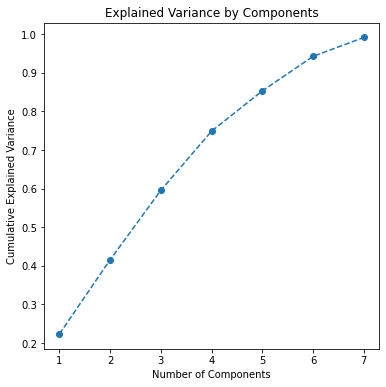

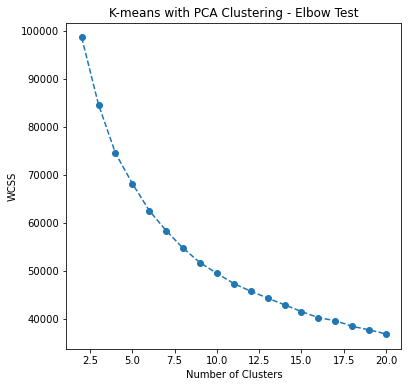

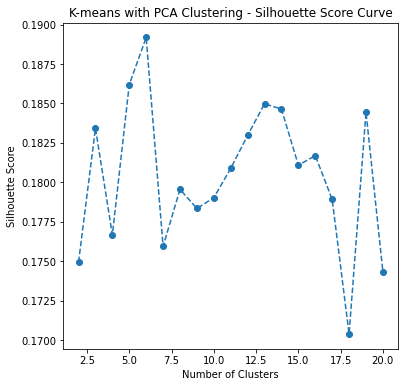

The component names are as follows:  ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']


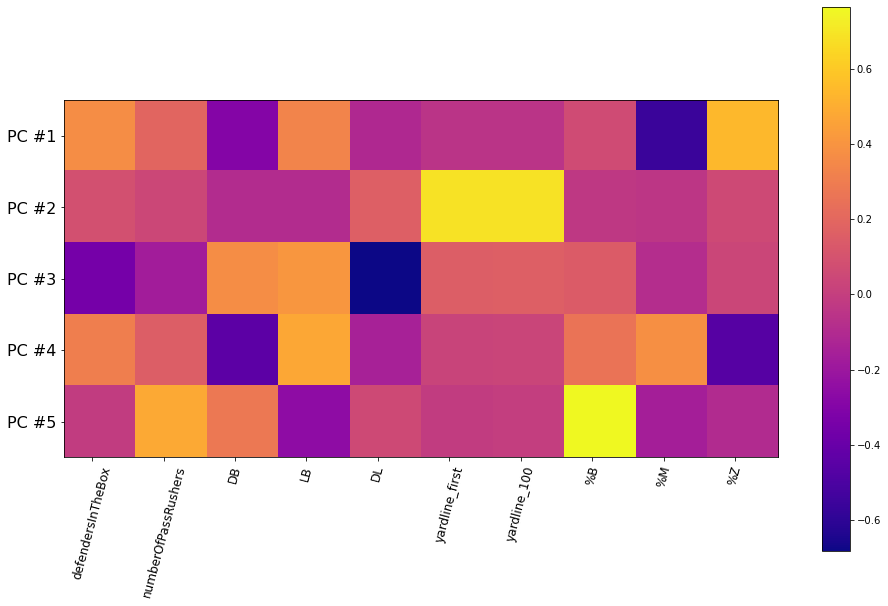

In [24]:
import def_clust
import importlib
importlib.reload(def_clust)
from def_clust import return_pca_and_clusters, kmeans_visual

df_seg = return_pca_and_clusters(d, n_clusters=4)

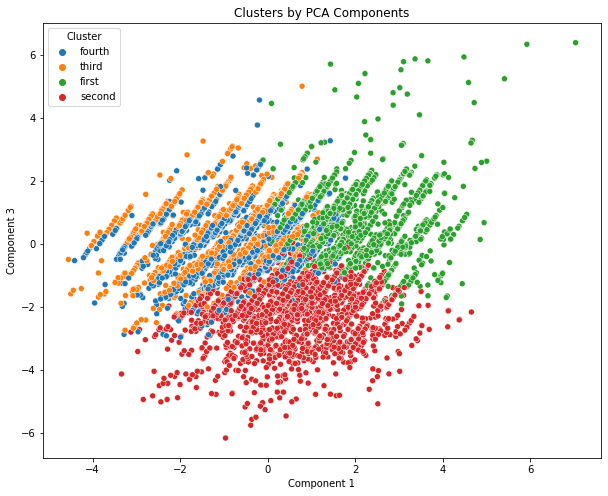

In [9]:
kmeans_visual(df_seg, 'Component 1', 'Component 3')

In [10]:
output_df = def_cleaning.generate_full_df(15, 17, fp='def_clean_output_test.csv')

...Week 15 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...distance calculated...
...action type generated...
.....Week 15 COMPLETE.....

   33.33% COMPLETE   

--- 0.5 minutes elapsed ---

the weeks complete:  [15]
...Week 16 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...distance calculated...
...action type generated...
.....Week 16 COMPLETE.....

   66.67% COMPLETE   

--- 1.1 minutes elapsed ---

the weeks complete:  [15 16]
...Week 17 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...distance calculated...
...action type generated...
.....Week 17 COMPLETE.....

   100.0% COMPLETE   

--- 1.7 minutes elapsed ---

the weeks complete:  [15 16 17]
Defensive cleaning complete --- check assets/def_clean_output_test.csv


In [11]:
d_test = pd.read_csv('assets/def_clean_output_test.csv')
d_test.head()

,gameId,playId,defendersInTheBox,DB,LB,DL,yardline_first,yardline_100,CBL0_act,CBL0_x_start,...,SSL2_y_start,SSR0_act,SSR0_x_start,SSR0_y_start,SSR1_act,SSR1_x_start,SSR1_y_start,SSR2_act,SSR2_x_start,SSR2_y_start
0,2018121300,84,7.0,4,3,4,70.0,76.0,M,6.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018121300,111,6.0,6,1,4,61.0,51.0,M,6.67,...,NaN,M,15.16,2.19,NaN,NaN,NaN,NaN,NaN,NaN
2,2018121300,164,6.0,6,1,4,84.0,74.0,M,3.79,...,NaN,M,5.29,-6.72,NaN,NaN,NaN,NaN,NaN,NaN
3,2018121300,189,5.0,6,1,4,84.0,79.0,M,5.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018121300,211,5.0,6,2,3,84.0,79.0,Z,2.21,...,NaN,Z,5.18,-8.36,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Calculate cosine similarity for defense

full_df, cut_df = def_cleaning.reduce_time(1)
cosine = def_cleaning.cosine_closest_player(cut_df)

...Week 1 loaded...
...filtered...
...transformed...
...time reduced...
...closest player based on cosine similarity calculated...


In [13]:
# Players with min and max cosine similarities are shown.
# High values mean that the player is moving in a more similar direction
# Low values mean that the player is moving in a more opposite direction.
cosine.head()

,gameId,playId,posId_def,time_cut_time2,posId_off_max,posId_off_min
0,2018090600,75,CBL0,2,WRR1,RBL0
1,2018090600,75,CBL0,3,WRR0,RBL0
2,2018090600,75,CBL0,4,TEL0,FBR0
3,2018090600,75,CBL0,5,WRR0,FBR0
4,2018090600,75,CBL0,6,WRR0,FBR0


In [13]:
from play_vis import create_starting_chart, create_full_chart

game_id = positions['gameId'].iloc[0]
play_id = positions['playId'].iloc[0]

# Below is an example of how to create the starting chart.
create_starting_chart(positions, game_id, play_id)

Play description: M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).


alt.LayerChart(...)

In [15]:
# Below is an example of how to create the full chart.
create_full_chart(positions, game_id, play_id, n_cuts=20)

Play description: M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).


alt.LayerChart(...)